In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Loading the images using tensorflow for our motive

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

image_dir = (r"D:\Data Science\Portfolio\Flat Tyre\tire-dataset")
categories = ["flat.class", "full.class", "no-tire.class"]

images = {category: [] for category in categories}

for category in categories:
    category_path = os.path.join(image_dir, category)
    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = load_img(img_path, target_size=(240, 240))
        img_array = img_to_array(img)
        images[category].append(img_array)

for category, img_list in images.items():
    print(f"Loaded {len(img_list)} images from {category}.")

Loaded 300 images from flat.class.
Loaded 300 images from full.class.
Loaded 300 images from no-tire.class.


## Visualising the Data

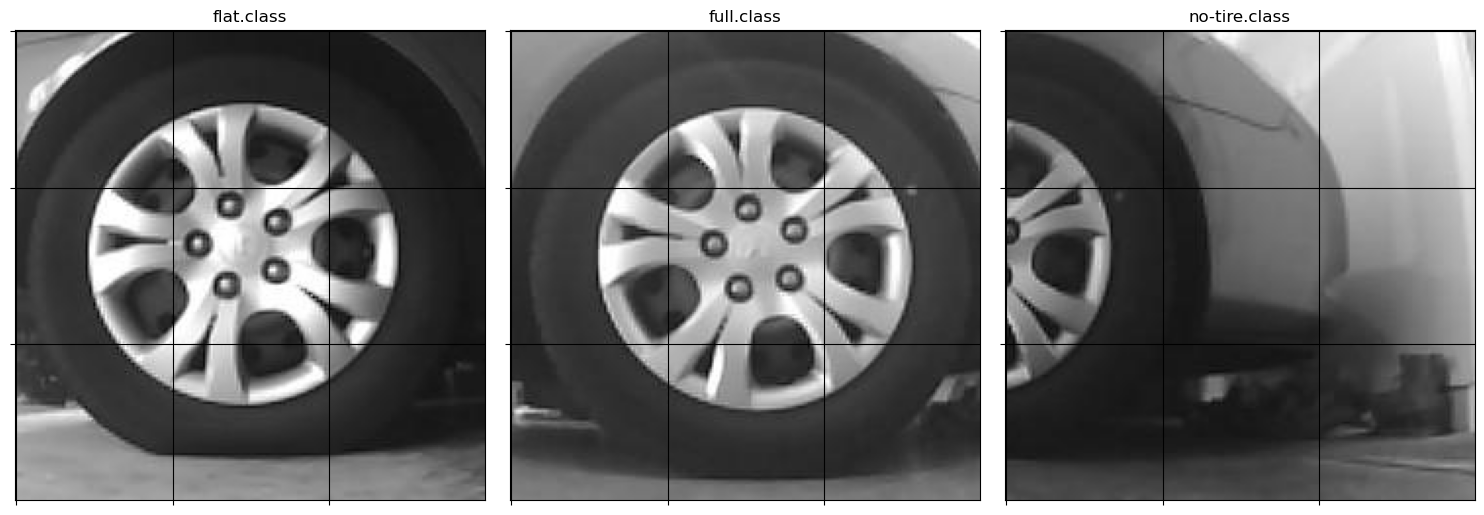

In [3]:
import numpy as np

num_categories = len(categories)

fig, axes = plt.subplots(1, num_categories, figsize=(15, 5))

for i, category in enumerate(categories):
    sample_image = images[category][0]

    # Display images
    axes[i].imshow(sample_image.astype("uint8"))
    # Enabling grid on images
    axes[i].grid(True, color='black', linewidth=0.8)

    # Adjusting the grid spacing
    axes[i].set_xticks(np.arange(0, sample_image.shape[1], 80))  # Adjusting the grid step for X-axis
    axes[i].set_yticks(np.arange(0, sample_image.shape[0], 80))  # Adjusting the grid step for Y-axis
    
    axes[i].set_title(category)
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])

plt.tight_layout()
plt.show()

# Feature Extraction and Data Splitting

In [4]:
from sklearn.model_selection import train_test_split

X = []
y = []

# Assigning numerical labels to categories
category_labels = {category: idx for idx, category in enumerate(categories)}

# Extracting features and labels
for category in categories:
    for img_array in images[category]:
        X.append(img_array) # Store image array
        y.append(category_labels[category]) # Store label

# Converting to NumPy arrays
X = np.array(X)
y = np.array(y)

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)

Feature shape: (900, 240, 240, 3)
Labels shape: (900,)


### Normalizing Image Data

In [15]:
X = X/255.0

X = X.reshape(X.shape[0], -1)
y = y.reshape(-1,1)

In [20]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (720, 172800)
Testing data shape: (180, 172800)


### Model Fitting

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [22]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train, y_train)

C:\Users\shane\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

### Model Evaluation

In [23]:
y_pred = knn_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        60
           1       0.84      0.90      0.87        60
           2       1.00      1.00      1.00        60

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

